# Desafio Data Science (Semantix)

In this challenge, suppose we are looking to do social network
analysis for prospective customers. We want to extract from
their social network a metric called "closeness centrality".
 
Centrality metrics try to approximate a measure of influence
of an individual within a social network. The distance between
any two vertices is their shortest path. The *farness*
of a given vertex *v* is the sum of all distances from each vertex
to *v*. Finally, the *closeness* of a vertex *v* is the inverse
of the *farness*.
 
The first part of the challenge is to rank the vertices in a given
graph by their *closeness*. The graph is provided in the attached
file; each line of the file consists of two vertex names separated by
a single space, representing an edge between those two nodes.
 
The second part of the challenge is to create a RESTful web server
with endpoints to register edges and display the centrality of the graph.
 
You should deliver a git repository with your code and a short README
file outlining the solution and explaining how to build and run the
code. You should deliver your code in a functional programming
language — Clojure, Haskell, ML, F# and Scala are acceptable — and
we'll analyse the structure and readability of the code-base. We
expect production-grade code. There is no problem in using libraries,
for instance for testing or network interaction, but please avoid
using a library that already implements the core graph or social
network algorithms.
 
Don't shy away from asking questions whenever you encounter a problem.
Also, please do get in touch at any moment if you believe the timeframe
is unrealistic.
 
References:
- Closeness Centrality: http://en.wikipedia.org/wiki/Centrality#Closeness_centrality
- Shortest path: http://en.wikipedia.org/wiki/Shortest_path_problem

#### Foram considerados os seguintes critérios 

* Vértices são equidistantes;
* Os vértices possuem relacionamentos bi-derecionais;
* Api Rest simples sem tratamento de parâmetros e sem análise de todas as possibilidades de retornos de erros;

#### Carregando arquivo e montando a estrutura de grafo

In [1]:
import collections
import networkx as nx

dados = open('edges.dat')
grafo = nx.Graph()

for linha in dados:
    v1,v2 = linha.replace("\n","").split(" ")
    grafo.add_node(v1)
    grafo.add_node(v2)
    grafo.add_edge(v1,v2)

#### Visualizando grafo gerado e estatísticas - Opcional

In [2]:
grafo.number_of_nodes()

100

In [3]:
grafo.number_of_edges()

898

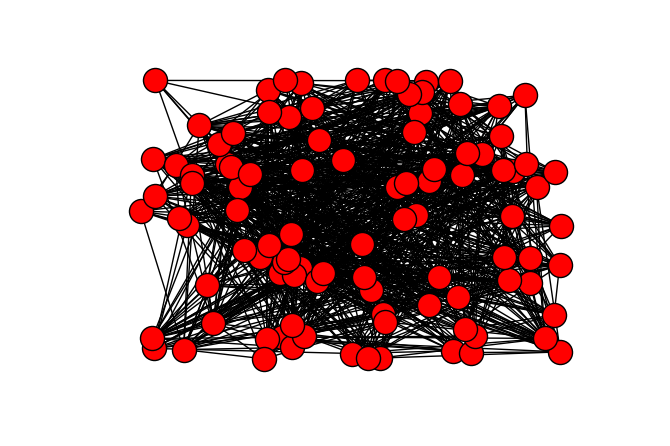

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

nx.draw_random(grafo)
plt.show()



#### Closeness

In [5]:
import operator

closeness = {}
closeness_vet = None
closeness_max_value = None

for no in grafo.nodes():
    closeness[no] = 1/float(sum(nx.single_source_shortest_path_length(grafo, no).itervalues()))

closeness_max_value = max(closeness.itervalues())
closeness_vet = max(closeness.iteritems(), key=operator.itemgetter(1))[0]

print "Closeness Max Value",closeness_max_value
print "Vertice ",closeness_vet

Closeness Max Value 0.0059880239521
Vertice  44


#### Funções para a API REST 

In [6]:

def adiciona_relacionamento(v1,v2):
    global closeness_max_value
    global closeness_vet
    global grafo
    global closeness
    
    grafo.add_node(v1)
    grafo.add_node(v2)
    grafo.add_edge(v1,v2)
    
    for no in grafo.nodes():
        closeness[no] = 1/float(sum(nx.single_source_shortest_path_length(grafo, no).itervalues()))

    closeness_max_value = max(closeness.itervalues())
    closeness_vet = max(closeness.iteritems(), key=operator.itemgetter(1))[0]
    

#### API REST

In [7]:
from flask import Flask
from flask import request

app = Flask(__name__)

@app.route('/add_edge',methods=['GET', 'POST'])
def add_edges():
    if request.method == 'POST':
        v1 = request.form['v1']
        v2 = request.form['v2']
        adiciona_relacionamento(v1,v2)
        return "Relacionamento adicionado", 201
    
    elif request.method == 'GET':
        v1 = request.args.get('v1')
        v2 = request.args.get('v2')
        adiciona_relacionamento(v1,v2)
        return "Relacionamento adicionado", 201
    else:
        return "",501
    
@app.route('/centralidade',methods=['GET'])
def centralidade():
    global closeness_vet
    global closeness_max_value
    if request.method == 'GET':
        return "Vertice %s com valor de %.4f de closeness."%(closeness_vet,closeness_max_value) , 201
    else:
        return "",501

if __name__ == '__main__':
    app.run(debug=False)

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Nov/2016 15:44:02] "GET /add_edge?v1=5&v2=15 HTTP/1.1" 201 -
127.0.0.1 - - [10/Nov/2016 15:44:26] "GET /centralidade HTTP/1.1" 201 -
127.0.0.1 - - [10/Nov/2016 15:44:39] "GET /add_edge?v1=86&v2=15 HTTP/1.1" 201 -
127.0.0.1 - - [10/Nov/2016 15:44:43] "GET /centralidade HTTP/1.1" 201 -
127.0.0.1 - - [10/Nov/2016 15:45:04] "GET /centralidade HTTP/1.1" 201 -
127.0.0.1 - - [10/Nov/2016 15:45:12] "GET /add_edge?v1=44&v2=15 HTTP/1.1" 201 -
127.0.0.1 - - [10/Nov/2016 15:45:17] "GET /centralidade HTTP/1.1" 201 -
127.0.0.1 - - [10/Nov/2016 15:45:28] "GET /add_edge?v1=101&v2=15 HTTP/1.1" 201 -
127.0.0.1 - - [10/Nov/2016 15:45:31] "GET /centralidade HTTP/1.1" 201 -
127.0.0.1 - - [10/Nov/2016 15:45:40] "GET /add_edge?v1=101&v2=44 HTTP/1.1" 201 -
127.0.0.1 - - [10/Nov/2016 15:45:45] "GET /centralidade HTTP/1.1" 201 -
127.0.0.1 - - [10/Nov/2016 15:59:09] "GET /centralidade HTTP/1.1" 201 -
127.0.0.1 - - [10/Nov/2016 15:59:11